In [ ]:
# Saving files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import layers
from tensorflow.keras.models import Model
from keras.layers import Dense, Input

import requests

In [ ]:

weather_df_2018 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/AWS_2018_경상남도.csv', encoding='cp949')
weather_df_2019 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/AWS_2019_경상남도.csv', encoding='cp949')
weather_df_2020 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/AWS_2020_경상남도.csv', encoding='cp949')
weather_df_2021 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/AWS_2021_경상남도.csv', encoding='cp949')
weather_df_2022 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/AWS_2022_경상남도.csv', encoding='cp949')
weather_df_2023 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/AWS_2023_경상남도.csv', encoding='cp949')

weather_df = pd.concat([weather_df_2018, weather_df_2019, weather_df_2020, weather_df_2021, weather_df_2022, weather_df_2023], ignore_index=True)

# Renaming the column name to english
weather_df.rename(columns={'지점':'location',
                              '지점명': 'location_name',
                              '일시': 'time',
                              '기온(°C)': 'temp',
                              '풍속(m/s)': 'wind',
                              '풍향(deg)': 'wind_direction',
                              '강수량(mm)': 'rain',
                              '현지기압(hPa)': 'Pressure',
                              '해면기압(hPa)': 'Sea level Pressure',
                              '습도(%)': 'humidity'
                              }, inplace = True)

weather_df['time'] = pd.to_datetime(weather_df['time'], format='%Y-%m-%d %H:%M')
weather_df.index = weather_df['time']
weather_df = weather_df.drop(['Pressure', 'Sea level Pressure'], axis=1)
weater_df = weather_df.dropna()

weather_df

,location,location_name,time,temp,wind_direction,wind,rain,humidity
time,,,,,,,,
2018-01-01 00:00:00,311,가야산,2018-01-01 00:00:00,-3.2,161.9,1.5,0.0,54.0
2018-01-01 01:00:00,311,가야산,2018-01-01 01:00:00,-3.6,153.5,1.4,0.0,57.0
2018-01-01 02:00:00,311,가야산,2018-01-01 02:00:00,-3.5,158.2,2.1,0.0,56.0
2018-01-01 03:00:00,311,가야산,2018-01-01 03:00:00,-3.9,168.5,3.1,0.0,52.0
2018-01-01 04:00:00,311,가야산,2018-01-01 04:00:00,-4.1,64.3,3.0,0.0,53.0
...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,974,대곡,2023-12-31 19:00:00,3.5,113.8,0.7,0.0,80.0
2023-12-31 20:00:00,974,대곡,2023-12-31 20:00:00,1.9,67.3,1.9,0.0,88.0
2023-12-31 21:00:00,974,대곡,2023-12-31 21:00:00,2.5,0.0,0.3,0.0,87.0


In [ ]:
weather_df_count = weather_df.groupby('location').count()

weather_df_count

,location_name,time,temp,wind_direction,wind,rain,humidity
location,,,,,,,
311,52254,52254,52137,52205,52194,51535,52145
313,45227,45227,45095,45066,45065,44986,45180
673,52535,52535,52461,52201,52189,52178,21072
872,52307,52307,52238,52220,52219,50886,52116
899,35245,35245,35196,35145,35145,34996,35245
902,52494,52494,52428,52391,52394,52093,52468
903,52536,52536,52489,52362,52353,51990,35191
905,52535,52535,52479,52500,52499,52187,21388
906,52430,52430,52320,52072,52067,51954,21295


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2126962 entries, 2018-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   location        int64         
 1   location_name   object        
 2   time            datetime64[ns]
 3   temp            float64       
 4   wind_direction  float64       
 5   wind            float64       
 6   rain            float64       
 7   humidity        float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 146.0+ MB


In [ ]:
weather_df.describe()

,location,temp,wind_direction,wind,rain,humidity
count,2.126962e+06,2.124001e+06,2.118253e+06,2.119160e+06,2.107268e+06,1.592468e+06
mean,8.892428e+02,1.380365e+01,1.539802e+02,1.897244e+00,1.806826e-01,7.125583e+01
std,1.335346e+02,9.772653e+00,1.216768e+02,1.724377e+00,1.325158e+00,2.239381e+01
min,3.110000e+02,-1.910000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02
25%,9.080000e+02,6.300000e+00,3.140000e+01,7.000000e-01,0.000000e+00,5.500000e+01
50%,9.190000e+02,1.470000e+01,1.473000e+02,1.500000e+00,0.000000e+00,7.500000e+01
75%,9.330000e+02,2.180000e+01,2.706000e+02,2.700000e+00,0.000000e+00,9.100000e+01
max,9.740000e+02,4.320000e+01,3.600000e+02,3.910000e+01,9.800000e+01,1.000000e+02


# Single Variable LSTM


<ipython-input-7-208f25b46190>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp'] = temp['temp'].interpolate(method='linear')


<Axes: xlabel='time'>

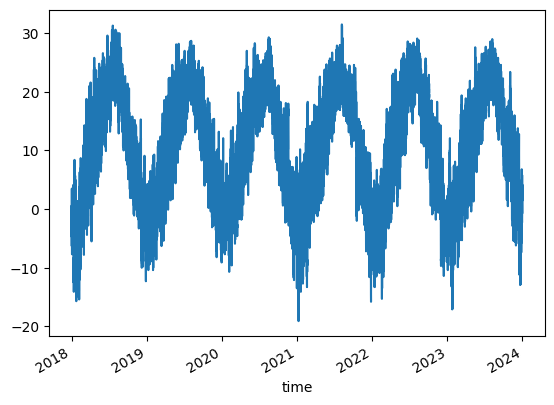

In [ ]:
temp = weather_df[weather_df['location_name'] == '가야산']
temp['temp'] = temp['temp'].interpolate(method='linear')
temp = temp['temp']
temp.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# Five rows: informations, predict 6


def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
window_size = 5
X, y = df_to_X_y(temp, window_size)
X.shape, y.shape

((52249, 5, 1), (52249,))

In [ ]:
X_train1, y_train1 = X[:40000], y[:40000]
X_val1, y_val1 = X[40000:45000], y[40000:45000]
X_test1, y_test1 = X[45000:], y[45000:]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((40000, 5, 1), (40000,), (5000, 5, 1), (5000,), (7249, 5, 1), (7249,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

model1 = Sequential()
model1.add(InputLayer((window_size, 1)))
model1.add(LSTM(128))
model1.add(Dense(16, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 68641 (268.13 KB)
Trainable params: 68641 (268.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
1250/1250 [==============================] - 14s 8ms/step - loss: 41.2913 - root_mean_squared_error: 6.4258 - val_loss: 3.5028 - val_root_mean_squared_error: 1.8716
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9045 - root_mean_squared_error: 1.3800 - val_loss: 1.2256 - val_root_mean_squared_error: 1.1071
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0930 - root_mean_squared_error: 1.0454 - val_loss: 0.9983 - val_root_mean_squared_error: 0.9991
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9866 - root_mean_squared_error: 0.9933 - val_loss: 0.9477 - val_root_mean_squared_error: 0.9735
Epoch 5/20
1250/1250 [==============================] - 9s 8ms/step - loss: 0.9591 - root_mean_squared_error: 0.9793 - val_loss: 0.9267 - val_root_mean_squared_error: 0.9626
Epoch 6/20
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9464 - root_mean_squared_error: 0.9728 - val_loss:

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train1})
train_results

1250/1250 [==============================] - 3s 2ms/step


,Train Predictions,Actuals
0,-4.058280,-4.1
1,-3.877246,-4.0
2,-3.662721,-4.0
3,-3.732109,-3.8
4,-3.396990,-3.5
...,...,...
39995,21.923567,22.7
39996,22.645922,23.6
39997,23.666245,23.8
39998,23.702200,24.4


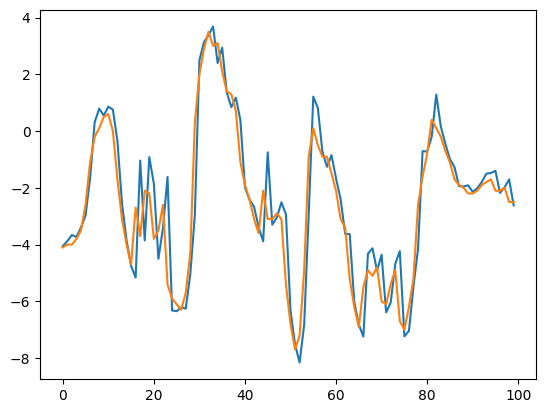

In [ ]:
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

# Variable Models



In [ ]:
gaya = weather_df[weather_df['location_name'] == '가야산']
gaya

,location,location_name,time,temp,wind_direction,wind,rain,humidity
time,,,,,,,,
2018-01-01 00:00:00,311,가야산,2018-01-01 00:00:00,-3.2,161.9,1.5,0.0,54.0
2018-01-01 01:00:00,311,가야산,2018-01-01 01:00:00,-3.6,153.5,1.4,0.0,57.0
2018-01-01 02:00:00,311,가야산,2018-01-01 02:00:00,-3.5,158.2,2.1,0.0,56.0
2018-01-01 03:00:00,311,가야산,2018-01-01 03:00:00,-3.9,168.5,3.1,0.0,52.0
2018-01-01 04:00:00,311,가야산,2018-01-01 04:00:00,-4.1,64.3,3.0,0.0,53.0
...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,311,가야산,2023-12-31 19:00:00,1.2,46.3,1.2,0.0,81.0
2023-12-31 20:00:00,311,가야산,2023-12-31 20:00:00,0.0,121.1,0.6,0.0,89.0
2023-12-31 21:00:00,311,가야산,2023-12-31 21:00:00,-0.1,185.5,0.8,0.0,91.0


In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start = 0, end = 100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, predictions)

227/227 [==============================] - 1s 4ms/step


(      Predictions  Actuals
 0        5.936985      3.8
 1        2.120391      1.6
 2        0.507665      0.5
 3       -0.307412     -0.4
 4       -0.954354     -0.6
 ...           ...      ...
 7244     1.285751      1.2
 7245     1.046816      0.0
 7246    -0.679277     -0.1
 7247    -0.228176     -0.5
 7248    -0.629591     -0.6
 
 [7249 rows x 2 columns],
 0.9269253227201075)

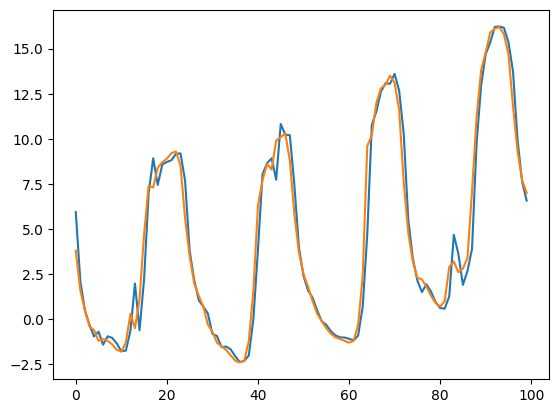

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(128, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(16, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 128)            384       
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                8208      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8609 (33.63 KB)
Trainable params: 8609 (33.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp2])

Epoch 1/20
1250/1250 [==============================] - 7s 4ms/step - loss: 6.7928 - root_mean_squared_error: 2.6063 - val_loss: 2.0512 - val_root_mean_squared_error: 1.4322
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4876 - root_mean_squared_error: 1.2197 - val_loss: 1.2207 - val_root_mean_squared_error: 1.1049
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1010 - root_mean_squared_error: 1.0493 - val_loss: 1.0206 - val_root_mean_squared_error: 1.0103
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0211 - root_mean_squared_error: 1.0105 - val_loss: 0.9978 - val_root_mean_squared_error: 0.9989
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0032 - root_mean_squared_error: 1.0016 - val_loss: 0.9671 - val_root_mean_squared_error: 0.9834
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9949 - root_mean_squared_error: 0.9975 - val_loss: 0

In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(128))
model3.add(Flatten())
model3.add(Dense(16, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 52385 (204.63 KB)
Trainable params: 52385 (204.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp3])

Epoch 1/20
1250/1250 [==============================] - 11s 7ms/step - loss: 35.5802 - root_mean_squared_error: 5.9649 - val_loss: 2.6287 - val_root_mean_squared_error: 1.6213
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5196 - root_mean_squared_error: 1.2327 - val_loss: 1.1215 - val_root_mean_squared_error: 1.0590
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0498 - root_mean_squared_error: 1.0246 - val_loss: 0.9688 - val_root_mean_squared_error: 0.9843
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9731 - root_mean_squared_error: 0.9864 - val_loss: 0.9426 - val_root_mean_squared_error: 0.9709
Epoch 5/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9541 - root_mean_squared_error: 0.9768 - val_loss: 0.9388 - val_root_mean_squared_error: 0.9689
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9470 - root_mean_squared_error: 0.9731 - val_loss:

# Multiple Variable

In [ ]:
temp_df = pd.DataFrame({'temperature': temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)

In [ ]:
day = 24*60*60
year = (365.2425)*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))

In [ ]:
# Avoiding reputational data
temp_df = temp_df.drop('Seconds', axis=1)

temp_df.head()

,temperature,Day sin,Day cos,Year sin,Year cos
time,,,,,
2018-01-01 00:00:00,-3.2,-2.389847e-12,1.000000,0.006193,0.999981
2018-01-01 01:00:00,-3.6,2.588190e-01,0.965926,0.006910,0.999976
2018-01-01 02:00:00,-3.5,5.000000e-01,0.866025,0.007626,0.999971
2018-01-01 03:00:00,-3.9,7.071068e-01,0.707107,0.008343,0.999965
2018-01-01 04:00:00,-4.1,8.660254e-01,0.500000,0.009060,0.999959


In [ ]:
# [[[t1, daysin1], [t2, daysin2], [t3, daysin3], [t4, daysin4], [t5, daysin5]]] [t6, daysin6]
# Five rows: informations, predict 6 (Temperature)


def df_to_X_y2(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((52248, 6, 5), (52248,))

In [ ]:
X_train2, y_train2 = X2[:40000], y2[:40000]
X_val2, y_val2 = X2[40000:45000], y2[40000:45000]
X_test2, y_test2 = X2[45000:], y2[45000:]

X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((40000, 6, 5), (40000,), (5000, 6, 5), (5000,), (7248, 6, 5), (7248,))

In [ ]:
temp_training_mean = np.mean(X_train2[:,:, 0])
temp_training_std = np.std(X_train2[:,:, 0])

def preprocess(X):
    X[:,:, 0] = (X[:,:, 0] - temp_training_mean) / temp_training_std
    return X

In [ ]:
preprocess(X_train2)
preprocess(X_val2)
preprocess(X_test2)

array([[[-1.94751865e-01, -2.58819045e-01, -9.65925826e-01,
          8.72953687e-01,  4.87803095e-01],
        [-8.92088608e-02, -5.00000000e-01, -8.66025404e-01,
          8.73303112e-01,  4.87177252e-01],
        [-2.58830585e-02, -7.07106781e-01, -7.07106781e-01,
          8.73652087e-01,  4.86551159e-01],
        [-6.81002600e-02, -8.66025404e-01, -5.00000000e-01,
          8.74000614e-01,  4.85924815e-01],
        [-2.36969066e-01, -9.65925826e-01, -2.58819045e-01,
          8.74348692e-01,  4.85298222e-01],
        [-6.16923881e-01, -1.00000000e+00, -4.15428197e-12,
          8.74696321e-01,  4.84671380e-01]],

       [[-8.92088608e-02, -5.00000000e-01, -8.66025404e-01,
          8.73303112e-01,  4.87177252e-01],
        [-2.58830585e-02, -7.07106781e-01, -7.07106781e-01,
          8.73652087e-01,  4.86551159e-01],
        [-6.81002600e-02, -8.66025404e-01, -5.00000000e-01,
          8.74000614e-01,  4.85924815e-01],
        [-2.36969066e-01, -9.65925826e-01, -2.58819045e-01,
  

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(128))
model4.add(Dense(16, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               68608     
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 70689 (276.13 KB)
Trainable params: 70689 (276.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=20, callbacks=[cp4])

Epoch 1/20
1250/1250 [==============================] - 11s 8ms/step - loss: 33.7952 - root_mean_squared_error: 5.8134 - val_loss: 5.7388 - val_root_mean_squared_error: 2.3956
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 4.1224 - root_mean_squared_error: 2.0304 - val_loss: 3.2828 - val_root_mean_squared_error: 1.8119
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 2.9942 - root_mean_squared_error: 1.7304 - val_loss: 2.5400 - val_root_mean_squared_error: 1.5937
Epoch 4/20
1250/1250 [==============================] - 9s 8ms/step - loss: 2.2757 - root_mean_squared_error: 1.5086 - val_loss: 1.9819 - val_root_mean_squared_error: 1.4078
Epoch 5/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7035 - root_mean_squared_error: 1.3052 - val_loss: 1.5668 - val_root_mean_squared_error: 1.2517
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3390 - root_mean_squared_error: 1.1571 - val_loss:

227/227 [==============================] - 1s 2ms/step


(      Predictions  Actuals
 0        1.916994      1.6
 1        0.434465      0.5
 2       -0.029240     -0.4
 3       -0.710224     -0.6
 4       -0.813152     -1.2
 ...           ...      ...
 7243     0.483634      1.2
 7244     0.602333      0.0
 7245    -0.418308     -0.1
 7246    -0.337110     -0.5
 7247    -0.646761     -0.6
 
 [7248 rows x 2 columns],
 0.628785803648334)

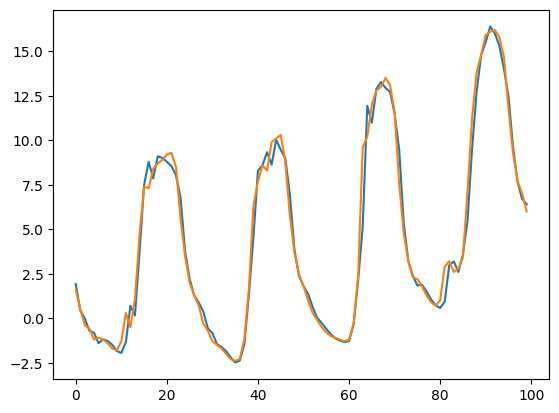

In [ ]:
plot_predictions1(model4, X_test2, y_test2)

In [ ]:
gaya['wind'] = gaya['wind'].interpolate(method='linear')
w_temp_df = pd.concat([gaya['wind'], temp_df], axis = 1)
w_temp_df.head()

<ipython-input-38-7a1c93d9e275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaya['wind'] = gaya['wind'].interpolate(method='linear')


,wind,temperature,Day sin,Day cos,Year sin,Year cos
time,,,,,,
2018-01-01 00:00:00,1.5,-3.2,-2.389847e-12,1.000000,0.006193,0.999981
2018-01-01 01:00:00,1.4,-3.6,2.588190e-01,0.965926,0.006910,0.999976
2018-01-01 02:00:00,2.1,-3.5,5.000000e-01,0.866025,0.007626,0.999971
2018-01-01 03:00:00,3.1,-3.9,7.071068e-01,0.707107,0.008343,0.999965
2018-01-01 04:00:00,3.0,-4.1,8.660254e-01,0.500000,0.009060,0.999959


In [ ]:
# [[[t1, daysin1], [t2, daysin2], [t3, daysin3], [t4, daysin4], [t5, daysin5]]] [t6, daysin6]
# Five rows: informations, predict 7 (Temperature)


def df_to_X_y3(df, window_size=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1] ]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(w_temp_df)
X3.shape, y3.shape

((52247, 7, 6), (52247, 2))

In [ ]:
X_train3, y_train3 = X3[:40000], y3[:40000]
X_val3, y_val3 = X3[40000:45000], y3[40000:45000]
X_test3, y_test3 = X3[45000:], y3[45000:]

X_train3.shape, y_train3.shape, X_val3.shape, y_val3.shape, X_test3.shape, y_test3.shape

((40000, 7, 6), (40000, 2), (5000, 7, 6), (5000, 2), (7247, 7, 6), (7247, 2))

In [ ]:
w_training_mean3 = np.mean(X_train3[:,:, 0])
w_training_std3 = np.std(X_train3[:,:, 0])

temp_training_mean3 = np.mean(X_train3[:,:, 1])
temp_training_std3 = np.std(X_train3[:,:, 1])

def preprocess3(X):
    X[:,:, 0] = (X[:,:, 0] - w_training_mean3) / w_training_std3
    X[:,:, 1] = (X[:,:, 1] - temp_training_mean3) / temp_training_std3
    return X


def preprocess_output3(y):
    y[:,0] = (y[:,0] - w_training_mean3) / w_training_std3
    y[:,1] = (y[:,1] - temp_training_mean3) / temp_training_std3
    return y

In [ ]:
preprocess3(X_train3)
preprocess3(X_val3)
preprocess3(X_test3)

array([[[ 4.04647316e+00, -1.94787822e-01, -2.58819045e-01,
         -9.65925826e-01,  8.72953687e-01,  4.87803095e-01],
        [ 2.36140298e+00, -8.92448739e-02, -5.00000000e-01,
         -8.66025404e-01,  8.73303112e-01,  4.87177252e-01],
        [ 1.23802286e+00, -2.59191052e-02, -7.07106781e-01,
         -7.07106781e-01,  8.73652087e-01,  4.86551159e-01],
        ...,
        [ 2.26980758e-01, -2.37005001e-01, -9.65925826e-01,
         -2.58819045e-01,  8.74348692e-01,  4.85298222e-01],
        [ 4.51656782e-01, -6.16959613e-01, -1.00000000e+00,
         -4.15428197e-12,  8.74696321e-01,  4.84671380e-01],
        [ 1.14642746e-01, -8.49154098e-01, -9.65925826e-01,
          2.58819045e-01,  8.75043500e-01,  4.84044289e-01]],

       [[ 2.36140298e+00, -8.92448739e-02, -5.00000000e-01,
         -8.66025404e-01,  8.73303112e-01,  4.87177252e-01],
        [ 1.23802286e+00, -2.59191052e-02, -7.07106781e-01,
         -7.07106781e-01,  8.73652087e-01,  4.86551159e-01],
        [ 1.14642

In [ ]:
preprocess_output3(y_train3)
preprocess_output3(y_val3)
preprocess_output3(y_test3)

array([[-0.22237129, -0.96525134],
       [-0.44704731, -1.06023999],
       [-0.22237129, -1.08134858],
       ...,
       [-0.11003328, -1.02857711],
       [-0.78406135, -1.07079429],
       [-0.67172334, -1.08134858]])

In [ ]:
model5 = Sequential()
model5.add(InputLayer((7,6)))
model5.add(LSTM(128))
model5.add(Dense(16, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               69120     
                                                                 
 dense_8 (Dense)             (None, 16)                2064      
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 71218 (278.20 KB)
Trainable params: 71218 (278.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=20, callbacks=[cp5])

Epoch 1/20
1250/1250 [==============================] - 12s 8ms/step - loss: 0.3059 - root_mean_squared_error: 0.5531 - val_loss: 0.2134 - val_root_mean_squared_error: 0.4620
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1971 - root_mean_squared_error: 0.4439 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1874 - root_mean_squared_error: 0.4329 - val_loss: 0.1869 - val_root_mean_squared_error: 0.4323
Epoch 4/20
1250/1250 [==============================] - 9s 8ms/step - loss: 0.1832 - root_mean_squared_error: 0.4281 - val_loss: 0.1851 - val_root_mean_squared_error: 0.4302
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1808 - root_mean_squared_error: 0.4252 - val_loss: 0.1858 - val_root_mean_squared_error: 0.4310
Epoch 6/20
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1790 - root_mean_squared_error: 0.4231 - val_loss: 

In [ ]:
def plot_predictions2(model, X, y, start = 0, end = 100):
    predictions = model.predict(X)
    w_preds, temp_preds = predictions[:,0], predictions[:,1]
    w_actuals, temp_actuals = y[:,0], y[:,1]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals': temp_actuals,
                            'Wind Predictions': w_preds,
                            'Wind Actuals': w_actuals
                            })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Wind Predictions'][start:end])
    plt.plot(df['Wind Actuals'][start:end])
    return df[start:end]

227/227 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Wind Predictions,Wind Actuals
0,-0.974531,-0.965251,0.017864,-0.222371
1,-1.089500,-1.060240,-0.156787,-0.447047
2,-1.145825,-1.081349,-0.321904,-0.222371
3,-1.145982,-1.144674,-0.248022,-0.222371
4,-1.167720,-1.134120,-0.234717,-0.222371
...,...,...,...,...
95,-0.009872,-0.036473,-0.193596,0.114643
96,-0.161396,-0.205342,-0.093980,0.114643
97,-0.297848,-0.279222,-0.021409,0.114643
98,-0.364514,-0.384765,0.046888,0.114643


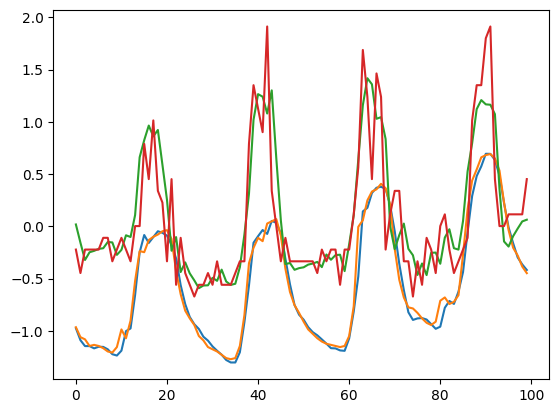

In [ ]:
plot_predictions2(model5, X_test3, y_test3)

In [ ]:
def postprocess_temp(arr):
    return (arr * temp_training_std3) + temp_training_mean3

def postprocess_wind(arr):
    return (arr * w_training_std3) + w_training_mean3

In [ ]:
def plot_predictions3(model, X, y, start = 0, end = 100):
    predictions = model.predict(X)
    w_preds, temp_preds = postprocess_wind(predictions[:,0]), postprocess_temp(predictions[:,1])
    w_actuals, temp_actuals = postprocess_wind(y[:,0]), postprocess_temp(y[:,1])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals': temp_actuals,
                            'Wind Predictions': w_preds,
                            'Wind Actuals': w_actuals
                            })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Wind Predictions'][start:end])
    plt.plot(df['Wind Actuals'][start:end])
    return df[start:end]

227/227 [==============================] - 1s 3ms/step


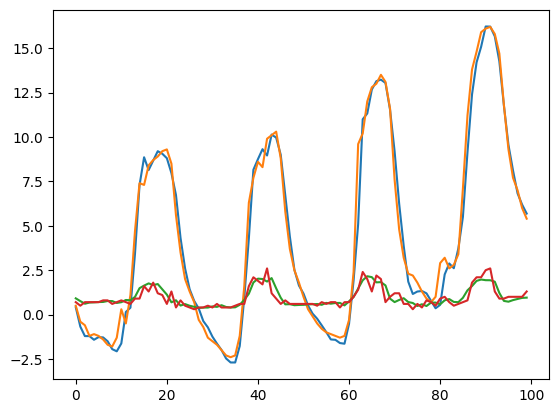

In [ ]:
post_processed_df = plot_predictions3(model5, X_test3, y_test3)

In [ ]:
model6 = Sequential()
model6.add(InputLayer((7,6)))
model6.add(LSTM(128, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(16, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 128)            69120     
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 119602 (467.20 KB)
Trainable params: 119602 (467.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
model6.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=20, callbacks=[cp6])

Epoch 1/20
1250/1250 [==============================] - 18s 12ms/step - loss: 0.3013 - root_mean_squared_error: 0.5489 - val_loss: 0.2301 - val_root_mean_squared_error: 0.4797
Epoch 2/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.2117 - root_mean_squared_error: 0.4601 - val_loss: 0.2043 - val_root_mean_squared_error: 0.4520
Epoch 3/20
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1969 - root_mean_squared_error: 0.4437 - val_loss: 0.1994 - val_root_mean_squared_error: 0.4465
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1887 - root_mean_squared_error: 0.4345 - val_loss: 0.1907 - val_root_mean_squared_error: 0.4367
Epoch 5/20
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1848 - root_mean_squared_error: 0.4298 - val_loss: 0.1842 - val_root_mean_squared_error: 0.4292
Epoch 6/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1822 - root_mean_squared_error: 0.4268 -

In [ ]:
model7 = Sequential()
model7.add(InputLayer((7,6)))
model7.add(Conv1D(128, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(16, 'relu'))
model7.add(Dense(1, 'linear'))

model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 128)            1664      
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_12 (Dense)            (None, 16)                12304     
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13985 (54.63 KB)
Trainable params: 13985 (54.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp7 = ModelCheckpoint('model7/', save_best_only=True)
model7.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
model7.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=20, callbacks=[cp7])

Epoch 1/20
1250/1250 [==============================] - 7s 4ms/step - loss: 0.7100 - root_mean_squared_error: 0.8426 - val_loss: 0.7753 - val_root_mean_squared_error: 0.8805
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6818 - root_mean_squared_error: 0.8257 - val_loss: 0.7723 - val_root_mean_squared_error: 0.8788
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6791 - root_mean_squared_error: 0.8241 - val_loss: 0.7713 - val_root_mean_squared_error: 0.8782
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6777 - root_mean_squared_error: 0.8232 - val_loss: 0.7709 - val_root_mean_squared_error: 0.8780
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6766 - root_mean_squared_error: 0.8225 - val_loss: 0.7702 - val_root_mean_squared_error: 0.8776
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6760 - root_mean_squared_error: 0.8222 - val_loss: 0

# Experiment


In [ ]:
temp_df.head()

,temperature,Day sin,Day cos,Year sin,Year cos
time,,,,,
2018-01-01 00:00:00,-3.2,-2.389847e-12,1.000000,0.006193,0.999981
2018-01-01 01:00:00,-3.6,2.588190e-01,0.965926,0.006910,0.999976
2018-01-01 02:00:00,-3.5,5.000000e-01,0.866025,0.007626,0.999971
2018-01-01 03:00:00,-3.9,7.071068e-01,0.707107,0.008343,0.999965
2018-01-01 04:00:00,-4.1,8.660254e-01,0.500000,0.009060,0.999959


In [ ]:
gaya.head()

,location,location_name,time,temp,wind_direction,wind,rain,humidity
time,,,,,,,,
2018-01-01 00:00:00,311,가야산,2018-01-01 00:00:00,-3.2,161.9,1.5,0.0,54.0
2018-01-01 01:00:00,311,가야산,2018-01-01 01:00:00,-3.6,153.5,1.4,0.0,57.0
2018-01-01 02:00:00,311,가야산,2018-01-01 02:00:00,-3.5,158.2,2.1,0.0,56.0
2018-01-01 03:00:00,311,가야산,2018-01-01 03:00:00,-3.9,168.5,3.1,0.0,52.0
2018-01-01 04:00:00,311,가야산,2018-01-01 04:00:00,-4.1,64.3,3.0,0.0,53.0


In [ ]:
gaya['wind'] = gaya['wind'].interpolate(method='linear')
gaya['wind_direction'] = gaya['wind_direction'].interpolate(method='linear')
gaya['rain'] = gaya['rain'].interpolate(method='linear')
gaya['humidity'] = gaya['humidity'].interpolate(method='linear')

<ipython-input-61-4eaaec045a7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaya['wind'] = gaya['wind'].interpolate(method='linear')
<ipython-input-61-4eaaec045a7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaya['wind_direction'] = gaya['wind_direction'].interpolate(method='linear')
<ipython-input-61-4eaaec045a7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
all_temp_df = pd.concat([gaya['humidity'],gaya['rain'],gaya['wind_direction'],gaya['wind'], temp_df], axis = 1)

all_temp_df.head()

,humidity,rain,wind_direction,wind,temperature,Day sin,Day cos,Year sin,Year cos
time,,,,,,,,,
2018-01-01 00:00:00,54.0,0.0,161.9,1.5,-3.2,-2.389847e-12,1.000000,0.006193,0.999981
2018-01-01 01:00:00,57.0,0.0,153.5,1.4,-3.6,2.588190e-01,0.965926,0.006910,0.999976
2018-01-01 02:00:00,56.0,0.0,158.2,2.1,-3.5,5.000000e-01,0.866025,0.007626,0.999971
2018-01-01 03:00:00,52.0,0.0,168.5,3.1,-3.9,7.071068e-01,0.707107,0.008343,0.999965
2018-01-01 04:00:00,53.0,0.0,64.3,3.0,-4.1,8.660254e-01,0.500000,0.009060,0.999959


In [ ]:
def df_to_X_y5(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        # Assuming the label includes the next row's first three values
        label = df_as_np[i+window_size][0:5]
        y.append(label)
    return np.array(X), np.array(y)

X_all, y_all = df_to_X_y5(all_temp_df)
X_all.shape, y_all.shape

((52244, 10, 9), (52244, 5))

In [ ]:
X_train_all, y_train_all = X_all[:40000], y_all[:40000]
X_val_all, y_val_all = X_all[40000:45000], y_all[40000:45000]
X_test_all, y_test_all = X_all[45000:], y_all[45000:]

X_train_all.shape, y_train_all.shape, X_val_all.shape, y_val_all.shape, X_test_all.shape, y_test_all.shape

((40000, 10, 9),
 (40000, 5),
 (5000, 10, 9),
 (5000, 5),
 (7244, 10, 9),
 (7244, 5))

In [ ]:
# humidity rain wind_direction wind temperature

h_training_mean_all = np.mean(X_train_all[:,:,0])
h_training_std_all = np.std(X_train_all[:,:,0])

r_training_mean_all = np.mean(X_train_all[:,:,1])
r_training_std_all = np.std(X_train_all[:,:,1])

wd_training_mean_all = np.mean(X_train_all[:,:,2])
wd_training_std_all = np.std(X_train_all[:,:,2])

w_training_mean_all = np.mean(X_train_all[:,:,3])
w_training_std_all = np.std(X_train_all[:,:,3])

t_training_mean_all = np.mean(X_train_all[:,:,4])
t_training_std_all = np.std(X_train_all[:,:,4])

def preprocess_all(X):
  X[:,:,0] = (X[:,:,0] - h_training_mean_all) / h_training_std_all
  X[:,:,1] = (X[:,:,1] - r_training_mean_all) / r_training_std_all
  X[:,:,2] = (X[:,:,2] - wd_training_mean_all) / wd_training_std_all
  X[:,:,3] = (X[:,:,3] - w_training_mean_all) / w_training_std_all
  X[:,:,4] = (X[:,:,4] - t_training_mean_all) / t_training_std_all
  return X

def preprocess_output_all(y):
  y[:,0] = (y[:,0] - h_training_mean_all) / h_training_std_all
  y[:,1] = (y[:,1] - r_training_mean_all) / r_training_std_all
  y[:,2] = (y[:,2] - wd_training_mean_all) / wd_training_std_all
  y[:,3] = (y[:,3] - w_training_mean_all) / w_training_std_all
  y[:,4] = (y[:,4] - t_training_mean_all) / t_training_std_all
  return y

preprocess_all(X_train_all)
preprocess_all(X_val_all)
preprocess_all(X_test_all)

array([[[-2.38593318e+00, -1.47486908e-01, -5.77322988e-01, ...,
         -9.65925826e-01,  8.72953687e-01,  4.87803095e-01],
        [-2.43117765e+00, -1.47486908e-01, -5.71578680e-01, ...,
         -8.66025404e-01,  8.73303112e-01,  4.87177252e-01],
        [-2.38593318e+00, -1.47486908e-01,  4.15621749e-01, ...,
         -7.07106781e-01,  8.73652087e-01,  4.86551159e-01],
        ...,
        [-9.38110148e-01, -1.47486908e-01,  9.21120888e-01, ...,
          5.00000000e-01,  8.75390229e-01,  4.83416949e-01],
        [-8.92865678e-01, -1.47486908e-01,  8.44803648e-01, ...,
          7.07106781e-01,  8.75736509e-01,  4.82789360e-01],
        [-6.21398859e-01, -1.47486908e-01,  8.11979028e-01, ...,
          8.66025404e-01,  8.76082339e-01,  4.82161524e-01]],

       [[-2.43117765e+00, -1.47486908e-01, -5.71578680e-01, ...,
         -8.66025404e-01,  8.73303112e-01,  4.87177252e-01],
        [-2.38593318e+00, -1.47486908e-01,  4.15621749e-01, ...,
         -7.07106781e-01,  8.73652087e

In [ ]:
preprocess_output_all(y_train_all)
preprocess_output_all(y_val_all)
preprocess_output_all(y_test_all)

array([[-0.57615439, -0.14748691,  0.93096827, -0.22229878, -1.14478264],
       [-0.44042098, -0.14748691,  0.99989997, -0.22229878, -1.13422832],
       [-0.39517651, -0.14748691,  0.91947966, -0.22229878, -1.14478264],
       ...,
       [ 1.00740205, -0.14748691,  0.70611963, -0.10995418, -1.02868512],
       [ 1.00740205, -0.14748691, -0.81612209, -0.78402174, -1.0709024 ],
       [ 1.05264652, -0.14748691, -0.81612209, -0.67167715, -1.08145672]])

In [ ]:
model_all = Sequential()
model_all.add(InputLayer((10,9)))
model_all.add(GRU(128))
model_all.add(Dense(32, 'relu'))
model_all.add(Dense(5, 'linear'))

model_all.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               53376     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 5)                 165       
                                                                 
Total params: 57669 (225.27 KB)
Trainable params: 57669 (225.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


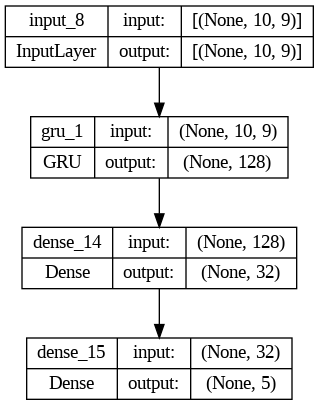

In [ ]:
from keras.utils import plot_model

plot_model(model_all, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
cp_all = ModelCheckpoint('model_all/', save_best_only=True)
model_all.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
model_all.fit(X_train_all, y_train_all, validation_data=(X_val_all, y_val_all), epochs=20, callbacks=[cp_all])

Epoch 1/20
1250/1250 [==============================] - 11s 7ms/step - loss: 0.4570 - root_mean_squared_error: 0.6760 - val_loss: 0.2976 - val_root_mean_squared_error: 0.5455
Epoch 2/20
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3514 - root_mean_squared_error: 0.5927 - val_loss: 0.2823 - val_root_mean_squared_error: 0.5313
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3405 - root_mean_squared_error: 0.5836 - val_loss: 0.2764 - val_root_mean_squared_error: 0.5257
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3359 - root_mean_squared_error: 0.5796 - val_loss: 0.2740 - val_root_mean_squared_error: 0.5235
Epoch 5/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3333 - root_mean_squared_error: 0.5773 - val_loss: 0.2723 - val_root_mean_squared_error: 0.5219
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3313 - root_mean_squared_error: 0.5756 - val_loss: 